# Contents

1. Import libraries and data
2. Make Subset
3. Line Chart
4. Decompose data's components
5. Dickey-Fuller test
6. Check Autocorrelations

# 1. Import libraries and data

In [2]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear.

In [3]:
# Configure API key
quandl.ApiConfig.api_key = 'r1W_cmzAGLKdHisWR_Fx'

In [4]:
# Importing the Federal Reserve Economic Data "Natural Rate of Unemployment" variable.

data = quandl.get('FRED/NROU')

QuandlError: (Status 403) Something went wrong. Please try again. If you continue to have problems, please contact us at connect@quandl.com.

In [2]:
# make a path to project folder
path = r'C:\Users\egrnw\anaconda3\Achievement 6 Project'

In [3]:
# import data
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'UFC data EXTRA cleaned.csv'), index_col = False)

In [4]:
df.head(5)

,Unnamed: 0,R_fighter,B_fighter,Referee,date,City,State/Province,Country,Winner,title_bout,...,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,Winner_encoded
0,0,Adrian Yanez,Gustavo Lopez,Chris Tognoni,3/20/2021,Las Vegas,Nevada,United States of America,Red,False,...,1,0,0,Orthodox,170.18,177.80,135.0,31.0,27.0,1
1,1,Trevin Giles,Roman Dolidze,Herb Dean,3/20/2021,Las Vegas,Nevada,United States of America,Red,False,...,3,0,0,Orthodox,182.88,187.96,185.0,32.0,28.0,1
2,2,Tai Tuivasa,Harry Hunsucker,Herb Dean,3/20/2021,Las Vegas,Nevada,United States of America,Red,False,...,3,0,0,Southpaw,187.96,190.50,264.0,32.0,28.0,1
3,3,Cheyanne Buys,Montserrat Conejo,Mark Smith,3/20/2021,Las Vegas,Nevada,United States of America,Blue,False,...,0,0,0,Switch,160.02,160.02,115.0,28.0,25.0,0
4,4,Marion Reneau,Macy Chiasson,Mark Smith,3/20/2021,Las Vegas,Nevada,United States of America,Blue,False,...,2,2,0,Orthodox,167.64,172.72,135.0,29.0,43.0,0


In [5]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [6]:
df.shape

(6012, 147)

In [7]:
print(df.columns.tolist())

['R_fighter', 'B_fighter', 'Referee', 'date', 'City', 'State/Province', 'Country', 'Winner', 'title_bout', 'weight_class', 'B_avg_KD', 'B_avg_opp_KD', 'B_avg_SIG_STR_pct', 'B_avg_opp_SIG_STR_pct', 'B_avg_TD_pct', 'B_avg_opp_TD_pct', 'B_avg_SUB_ATT', 'B_avg_opp_SUB_ATT', 'B_avg_REV', 'B_avg_opp_REV', 'B_avg_SIG_STR_att', 'B_avg_SIG_STR_landed', 'B_avg_opp_SIG_STR_att', 'B_avg_opp_SIG_STR_landed', 'B_avg_TOTAL_STR_att', 'B_avg_TOTAL_STR_landed', 'B_avg_opp_TOTAL_STR_att', 'B_avg_opp_TOTAL_STR_landed', 'B_avg_TD_att', 'B_avg_TD_landed', 'B_avg_opp_TD_att', 'B_avg_opp_TD_landed', 'B_avg_HEAD_att', 'B_avg_HEAD_landed', 'B_avg_opp_HEAD_att', 'B_avg_opp_HEAD_landed', 'B_avg_BODY_att', 'B_avg_BODY_landed', 'B_avg_opp_BODY_att', 'B_avg_opp_BODY_landed', 'B_avg_LEG_att', 'B_avg_LEG_landed', 'B_avg_opp_LEG_att', 'B_avg_opp_LEG_landed', 'B_avg_DISTANCE_att', 'B_avg_DISTANCE_landed', 'B_avg_opp_DISTANCE_att', 'B_avg_opp_DISTANCE_landed', 'B_avg_CLINCH_att', 'B_avg_CLINCH_landed', 'B_avg_opp_CLINCH_

In [8]:
type(df)

pandas.core.frame.DataFrame

# 2. Make Subset

In [9]:
# sort by lightweight class only 

df_lw = df[df["weight_class"].str.contains("Lightweight", case=False, na=False)].copy()

In [10]:
df_lw.shape

(1091, 147)

In [11]:
df_lw.head(10)

,R_fighter,B_fighter,Referee,date,City,State/Province,Country,Winner,title_bout,weight_class,...,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age,Winner_encoded
5,Leonardo Santos,Grant Dawson,Chris Tognoni,3/20/2021,Las Vegas,Nevada,United States of America,Blue,False,Lightweight,...,2,2,0,Orthodox,182.88,190.50,155.0,27.0,41.0,0
18,Nasrat Haqparast,Rafa Garcia,Chris Tognoni,3/13/2021,Las Vegas,Nevada,United States of America,Red,False,Lightweight,...,1,0,0,Southpaw,177.80,182.88,155.0,26.0,25.0,1
30,Islam Makhachev,Drew Dober,Chris Tognoni,3/6/2021,Las Vegas,Nevada,United States of America,Red,False,Lightweight,...,1,2,0,Southpaw,177.80,177.80,155.0,32.0,29.0,1
34,Uros Medic,Aalon Cruz,Mark Smith,3/6/2021,Las Vegas,Nevada,United States of America,Red,False,Lightweight,...,0,0,0,Southpaw,185.42,180.34,155.0,31.0,27.0,1
41,Alexander Hernandez,Thiago Moises,Mark Smith,2/27/2021,Las Vegas,Nevada,United States of America,Blue,False,Lightweight,...,2,0,0,Orthodox,175.26,182.88,155.0,25.0,28.0,0
72,Michael Johnson,Clay Guida,Mark Smith,2/6/2021,Las Vegas,Nevada,United States of America,Blue,False,Lightweight,...,4,0,0,Southpaw,177.80,185.42,155.0,39.0,34.0,0
74,Diego Ferreira,Beneil Dariush,Chris Tognoni,2/6/2021,Las Vegas,Nevada,United States of America,Blue,False,Lightweight,...,3,2,0,Orthodox,175.26,187.96,155.0,31.0,36.0,0
81,Dan Hooker,Michael Chandler,Marc Goddard,1/23/2021,Abu Dhabi,Abu Dhabi,United Arab Emirates,Blue,False,Lightweight,...,6,2,0,Switch,182.88,190.50,155.0,34.0,30.0,0
85,Dustin Poirier,Conor McGregor,Herb Dean,1/23/2021,Abu Dhabi,Abu Dhabi,United Arab Emirates,Red,False,Lightweight,...,8,3,0,Southpaw,175.26,182.88,155.0,32.0,32.0,1
87,Arman Tsarukyan,Matt Frevola,Lukasz Bosacki,1/23/2021,Abu Dhabi,Abu Dhabi,United Arab Emirates,Red,False,Lightweight,...,0,0,0,Orthodox,170.18,182.88,155.0,30.0,24.0,1


In [13]:
df_time = df_lw[['date', 'R_avg_SIG_STR_pct']]

<Axes: title={'center': 'Lightweight Division: Avg Significant Strike % Over Time'}, xlabel='date'>

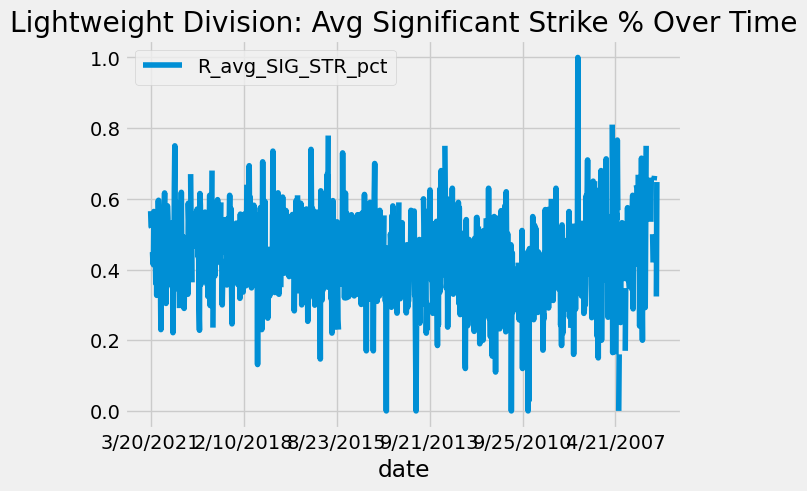

In [14]:
# Plot the data using matplotlib.

df_time.plot(x="date", y="R_avg_SIG_STR_pct", title="Lightweight Division: Avg Significant Strike % Over Time")

In [15]:
# Reset index so that you can use the "Date" column as a filter

df_time_2 = df_time.reset_index()

In [16]:
df_time_2.head()

,index,date,R_avg_SIG_STR_pct
0,5,3/20/2021,0.565156
1,18,3/13/2021,0.521875
2,30,3/6/2021,0.518750
3,34,3/6/2021,NaN
4,41,2/27/2021,0.449062


In [17]:
data_sub = df_time_2.loc[(df_time_2['date'] >= '1997-01-01') & (df_time_2['date'] < '2021-012-01')]

In [18]:
data_sub.shape

(93, 3)

In [19]:
data_sub.head()

,index,date,R_avg_SIG_STR_pct
4,41,2/27/2021,0.449062
5,72,2/6/2021,0.418471
6,74,2/6/2021,0.413535
53,511,2/29/2020,0.450625
54,513,2/22/2020,0.426194


In [20]:
# Set the "Date" column as the index

from datetime import datetime

data_sub['datetime'] = pd.to_datetime(data_sub['date']) # Create a datetime column from "Date.""
data_sub = data_sub.set_index('datetime') # Set the datetime as the index of the dataframe.
data_sub.drop(['date'], axis=1, inplace=True) # Drop the "Date" column.
data_sub.head()

,index,R_avg_SIG_STR_pct
datetime,,
2021-02-27,41,0.449062
2021-02-06,72,0.418471
2021-02-06,74,0.413535
2020-02-29,511,0.450625
2020-02-22,513,0.426194


In [21]:
# Check for missing values

data_sub.isnull().sum().sort_values(ascending=False)

R_avg_SIG_STR_pct    13
index                 0
dtype: int64

In [22]:
data_sub.dropna()

,index,R_avg_SIG_STR_pct
datetime,,
2021-02-27,41,0.449062
2021-02-06,72,0.418471
2021-02-06,74,0.413535
2020-02-29,511,0.450625
2020-02-22,513,0.426194
...,...,...
2003-02-28,5670,0.630000
2003-02-28,5672,0.425000
2001-02-23,5760,0.311250


In [ ]:
# Check for missing values

data_sub.isnull().sum().sort_values(ascending=False)

In [28]:
# Check for duplicates

dups = data_sub.duplicated()
dups.sum()

# No dups!

np.int64(0)

# Line Chart

In [33]:
data_sub.plot(x="datetime", y="R_avg_SIG_STR_pct", title="Lightweight Division: Avg Significant Strike % Over Time")

KeyError: 'datetime'

ConversionError: Failed to convert value(s) to axis units: array(['Alexander Hernandez', 'Michael Johnson', 'Diego Ferreira',
       'Luis Pena', 'Paul Felder', 'Jalin Turner', 'Brad Riddell',
       'Lando Vannata', 'Brok Weaver', 'Jim Miller', 'Damir Hadzovic',
       'Damir Ismagulov', 'Rustam Khabilov', 'James Vick',
       'Scott Holtzman', 'Lando Vannata', 'Devonte Smith',
       'Callan Potter', 'Charles Oliveira', 'Jared Gordon',
       'Sage Northcutt', 'James Vick', 'Damien Brown', 'Ross Pearson',
       'Michel Prazeres', 'Alan Patrick', 'Paul Felder', 'Dustin Poirier',
       'Nik Lentz', 'Abel Trujillo', 'Norman Parke', 'Teemu Packalen',
       'David Teymur', 'James Krause', 'Joshua Burkman', 'Tony Ferguson',
       'James Krause', 'Rustam Khabilov', 'Edson Barboza', 'Ivan Jorge',
       'Michel Prazeres', 'Efrain Escudero', 'James Moontasri',
       'Rafaello Oliveira', 'Ernest Chavez', 'Rodrigo Damm',
       'Francisco Trinaldo', 'Cristiano Marcello', 'Jamie Varner',
       'John Makdessi', 'Al Iaquinta', 'Anthony Rocco Martin',
       'Michael Chiesa', 'Sam Stout', 'Paul Sass', 'Terry Etim',
       'Jacob Volkmann', 'Gleison Tibau', 'Yves Edwards', 'Frankie Edgar',
       'Takanori Gomi', 'Anthony Pettis', 'Anton Kuivanen', 'Tim Means',
       'George Sotiropoulos', 'Ross Pearson', 'Maciej Jewtuszko',
       'Donald Cerrone', 'Paul Taylor', 'George Sotiropoulos',
       'Melvin Guillard', 'Mac Danzig', 'Rob Emerson', 'Diego Sanchez',
       'Evan Dunham', 'Terry Etim', 'Joe Lauzon', 'Matt Veach',
       'Josh Neer', 'Kurt Pellegrino', 'Gleison Tibau', 'Tyson Griffin',
       'Rob Emerson', 'Frankie Edgar', 'Roger Huerta', 'Dustin Hazelett',
       'BJ Penn', 'Yves Edwards', 'Din Thomas', 'Jens Pulver',
       'Jerry Bohlander', 'Jerry Bohlander', 'Yoshiki Takahashi'],
      dtype=object)

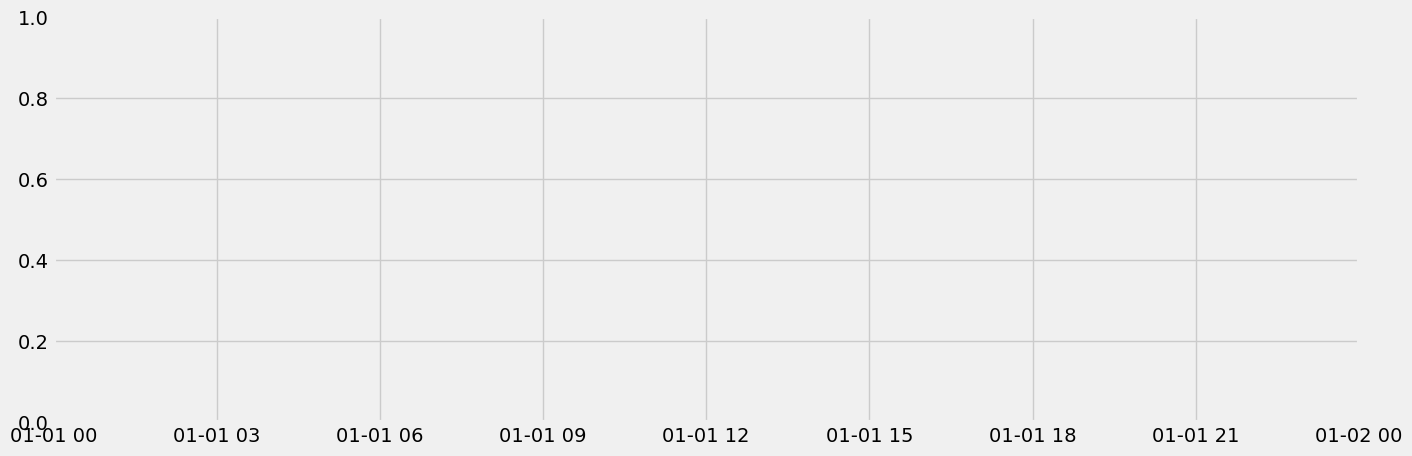

In [31]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_sub)
plt.title("Lightweight Division: Avg Significant Strike % Over Time")
plt.xlabel("date")
plt.ylabel("R_avg_SIG_STR_pct")